In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools
from scipy.spatial.distance import cdist


%matplotlib inline

In [13]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))

X = np.array([-4, -1, 0, 2]).reshape(-1, 1)
x_range = np.linspace(-6, 6, 500).reshape(-1, 1)

# Compute the kernel matrix
K = linear_kernel(X, X)

print("Input points:")
print(X)
print("\nKernel matrix:")
print(K)
 
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    squared_dists = cdist(X1, X2, 'sqeuclidean')
    return np.exp(-squared_dists / (2 * sigma**2))

def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    linear_term = np.dot(X1, X2.T)
    return (offset + linear_term) ** degree


Input points:
[[-4]
 [-1]
 [ 0]
 [ 2]]

Kernel matrix:
[[16  4  0 -8]
 [ 4  1  0 -2]
 [ 0  0  0  0]
 [-8 -2  0  4]]


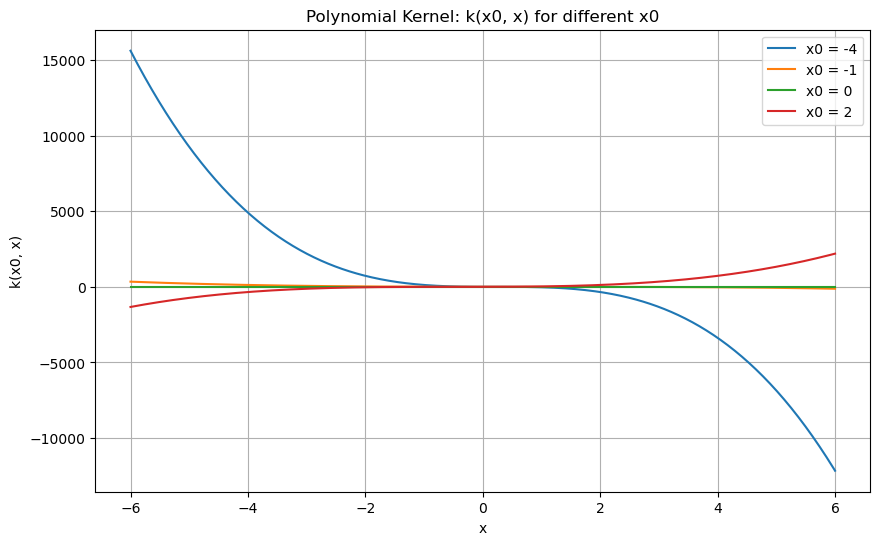

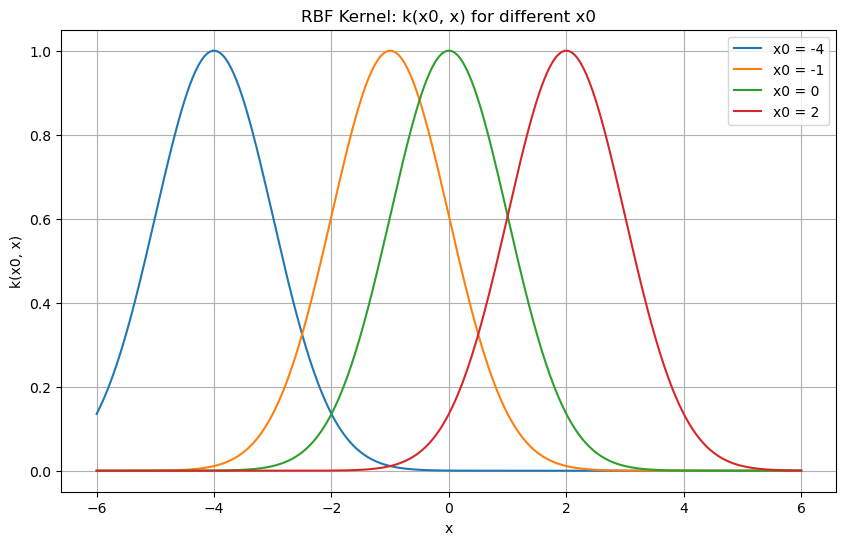

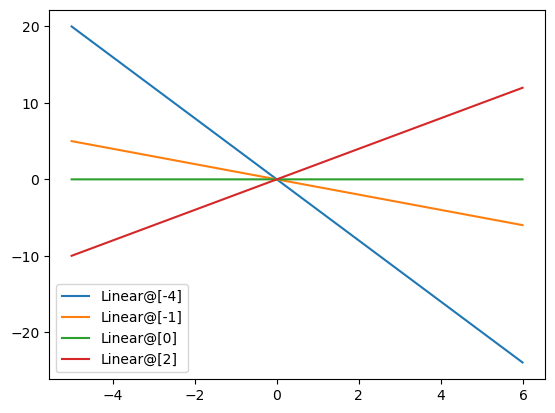

In [14]:
# PLot kernel machine functions

# (a) Plot for polynomial kernel
plt.figure(figsize=(10, 6))
for x0 in X:
    y = polynomial_kernel(x_range, x0.reshape(1, -1), offset=1, degree=3)
    plt.plot(x_range, y, label=f'x0 = {x0[0]}')

plt.title('Polynomial Kernel: k(x0, x) for different x0')
plt.xlabel('x')
plt.ylabel('k(x0, x)')
plt.legend()
plt.grid(True)
plt.show()

# (b) Plot for RBF kernel
plt.figure(figsize=(10, 6))
for x0 in X:
    y = RBF_kernel(x_range, x0.reshape(1, -1), sigma=1)
    plt.plot(x_range, y, label=f'x0 = {x0[0]}')

plt.title('RBF Kernel: k(x0, x) for different x0')
plt.xlabel('x')
plt.ylabel('k(x0, x)')
plt.legend()
plt.grid(True)
plt.show()

plot_step = .01
xpts = np.arange(-5.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show()

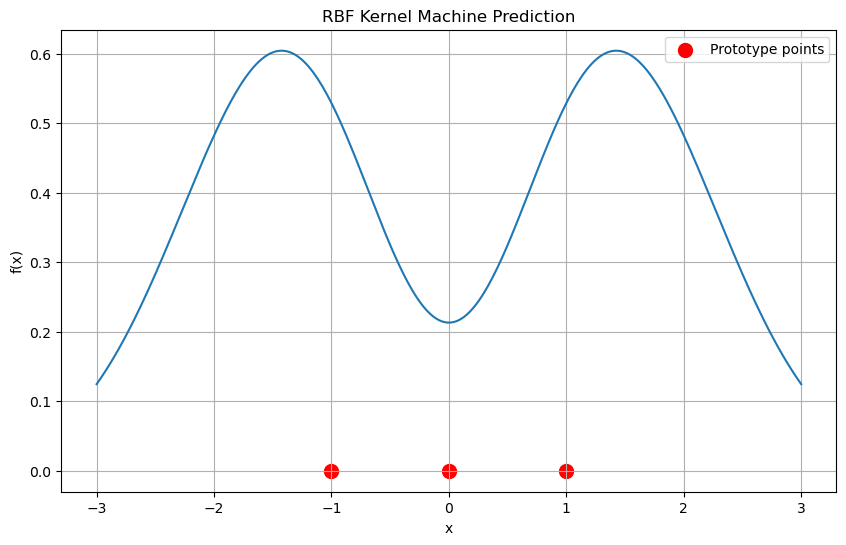

In [15]:
class Kernel_Machine(object):
    def __init__(self, kernel, training_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            training_points - an nxd matrix with rows x_1,..., x_n
            weights - a vector of length n with entries alpha_1,...,alpha_n
        """

        self.kernel = kernel
        self.training_points = training_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R alpha_i k(x_j, mu_i)
        """
        K = self.kernel(X, self.training_points)
        return np.dot(K, self.weights)

rbf_kernel = functools.partial(RBF_kernel, sigma=1)

prototype_points = np.array([-1, 0, 1]).reshape(-1, 1)
weights = np.array([1, -1, 1])
km = Kernel_Machine(rbf_kernel, prototype_points, weights)

x_range = np.linspace(-3, 3, 300).reshape(-1, 1)
y_pred = km.predict(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_pred)
plt.title('RBF Kernel Machine Prediction')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

plt.scatter(prototype_points, np.zeros_like(prototype_points), 
            c='red', s=100, label='Prototype points')
plt.legend()
plt.show()